# Homework 05 - Word clouds

_Goal_ :

**We want to generate word clouds from Hillary Clinton's emails corpus.**

_Tools_ :

**The tools used are :**

* pandas
* [word_cloud library](https://github.com/amueller/word_cloud)
* [nltk](http://www.nltk.org)

_Contents_ :

* [1 - Loading data](#1---Loading-data)
* [2 - Word cloud on the raw corpus](#2---Word-cloud-on-the-raw-corpus)
* [3 - Word cloud on the preprocessed corpus](#3---Word-cloud-on-the-preprocessed-corpus)

---

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import nltk

%matplotlib inline
sns.set_context('notebook')

# 1 - Loading data

In the first place, as usual, we load the `Emails.csv` file with pandas to form a DataFrame.

In [22]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# 2 - Word cloud on the raw corpus

In this part, we simply want to generate a word cloud based on the raw corpus, that is on the text formed by concatenating all the emails contents. In order to do this, we first build a string contaning all the text from the `ExtractedBodyText` column in the emails DataFrame. Note that we use this column since, according to the dataset documentation, it should contain "the text in the body that the email sender wrote" (whereas the `RawText` entries most likely contains emails "threads" and metadata information).

In [23]:
all_emails_text = ' '.join(emails.ExtractedBodyText.dropna())

Then, we use `wordcloud` to generate the word cloud based on this string.

In [24]:
wordcloud = wc.WordCloud(stopwords=None).generate(all_emails_text)

Finally, we can display the word cloud as an image.

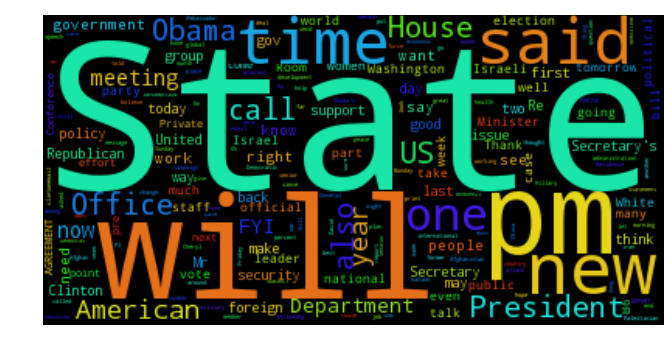

In [25]:
plt.imshow(wordcloud)
plt.axis("off");

# 3 - Word cloud on the preprocessed corpus

A more standard approach compared to what we did previously is to implement a text pre-processing pipeline before even working on the text. The steps followed after are :

1. **Tokenization** : split the raw corpus into words.
2. **Stopwords removal** : remove "common" words of english language that won't be of any help *for our visualization* since they don't represent topics discussed in the emails.
3. **Stemming** : reduce words to their root.


**NB** - Some useful pointers :
* http://www.nltk.org/book/ch03.html for details about the "classic" pipeline
* https://pythonprogramming.net/stop-words-nltk-tutorial/ for details about the steps

In [26]:
# Only do this once !
# Then select in the graphical interface what to download (all things from nltk book is ok)
# nltk.download()

First we tokenize our raw corpus :

In [27]:
tokens = nltk.wordpunct_tokenize(all_emails_text)
tokens[:20]

['B6',
 'Thursday',
 ',',
 'March',
 '3',
 ',',
 '2011',
 '9',
 ':',
 '45',
 'PM',
 'H',
 ':',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and']

Next task is to remove stopwords, ie. frequent words not useful for our visualization (not meaningful). Note that we also include punctation in the *stoplist*.

In [28]:
from nltk.corpus import stopwords

# Set 'english' stop words and update them with some punctuation 
stop_words = set(stopwords.words('english'))
punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '-', '--', '...', '•', "''", '""', '``', '@', '<', '>', "'s"]
stop_words.update(punctuation)

Then we can filter our tokens with a simple list comprehension. Note that here we also remove "words" that consists in a single character (those can be letters, digits, etc).

In [29]:
filtered_tokens = [t for t in tokens if (t not in stop_words and len(t)>1)]

In [30]:
print("Before stopword removal :", len(tokens), "tokens")
print("After stopword removal :", len(filtered_tokens), "tokens")

Before stopword removal : 744559 tokens
After stopword removal : 380185 tokens


As expected, the size of the tokens list has decreased.
Next we want to apply stemming to *normalize* the tokens :

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(t) for t in filtered_tokens]

Finally, we might want to transform all tokens to lowercase to avoid making a difference between `Word` and `word` for example.

In [32]:
final_tokens = [t.lower() for t in stemmed_tokens]

Then we join the resulting tokens and generate the word cloud as before.

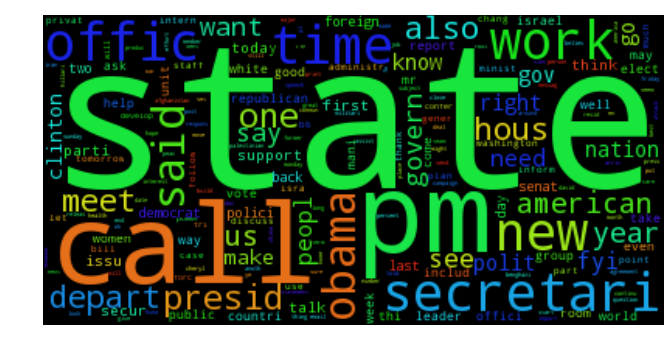

In [33]:
processed_text = ' '.join(final_tokens)
wordcloud_processed = wc.WordCloud().generate(processed_text)
plt.imshow(wordcloud_processed)
plt.axis("off");

**Discussion on the 2 versions of the word cloud :**

The first observation is that the word cloud on pre-processed text seems to have less *contrast* than the first (raw) version. This is probably due to the removal of a lot of emails and of the stopwords (yet in that sense, the second one is actually more representative of the *meaningful* content of the emails).

Also, since we used Porter stemming, the second word cloud may be a little harder to read simply because some "words" are in fact roots of words.